In [2]:
import requests
import matplotlib.pyplot as plt
##########################################
#code de recuperation des données externes
urlexo_pllist = "https://exoplanetarchive.ipac.caltech.edu/TAP/sync?query=select+distinct+\
pl_name,disc_year,sy_dist,discoverymethod,pl_bmasse,pl_rade,pl_orbper,pl_eqt,pl_dens\
+from+ps+&format=json"
response = requests.get(urlexo_pllist)
data_pllist = response.json()
#######################
#### ECRAN1
#######################
data_nbpl = list({(item['pl_name']) for item in data_pllist})
nb_exoplanets= len(data_nbpl)

In [3]:
nb_exoplanets

5885

In [4]:
# Regrouper par 'pl_name' et garder les valeurs maximales pour les autres colonnes
aggregated_data = {}
for row in data_pllist:
    pl_name = row['pl_name']
    if pl_name not in aggregated_data:
        aggregated_data[pl_name] = row
    else:
        for key in row:
            if key != 'pl_name' and row[key] is not None:
                # Conserver la valeur maximale pour les autres colonnes
                aggregated_data[pl_name][key] = max(aggregated_data[pl_name][key], row[key]) if aggregated_data[pl_name][key] is not None else row[key]


In [5]:
# Convertir en une liste de tuples pour MDDataTable
data_table_tuple = [
    (row['pl_name'], row['disc_year'], row['sy_dist'], row['discoverymethod'], row['pl_bmasse'], row['pl_rade'], row['pl_orbper'], row['pl_eqt'], row['pl_dens'])
    for row in aggregated_data.values()
]  

In [6]:
#cle associés
keys = ["pl_name","disc_year","sy_dist","discoverymethod","pl_bmasse","pl_rade","pl_orbper","pl_eqt","pl_dense"]

#conversion en liste de dict
data_table_dict = [dict(zip(keys, tpl)) for tpl in data_table_tuple]

#extraction des tuples (pl_name, disc_year) sans doublons
unique_data = list(set(map(lambda x: (x['pl_name'], x['disc_year']), data_table_dict)))


In [17]:
data_table_dict[0:10]

[{'pl_name': 'OGLE-TR-10 b',
  'disc_year': 2004,
  'sy_dist': 1344.97,
  'discoverymethod': 'Transit',
  'pl_bmasse': 359.1479,
  'pl_rade': 19.27948,
  'pl_orbper': 3.1014,
  'pl_eqt': 1702.0,
  'pl_dense': 0.815},
 {'pl_name': 'bet Pic b',
  'disc_year': 2008,
  'sy_dist': 19.7442,
  'discoverymethod': 'Imaging',
  'pl_bmasse': 6356.0,
  'pl_rade': 18.49485,
  'pl_orbper': 8617.50952,
  'pl_eqt': 1650.0,
  'pl_dense': None},
 {'pl_name': 'HD 180314 b',
  'disc_year': 2010,
  'sy_dist': 122.362,
  'discoverymethod': 'Radial Velocity',
  'pl_bmasse': 7216.92963775,
  'pl_rade': 1,
  'pl_orbper': 396.03,
  'pl_eqt': None,
  'pl_dense': None},
 {'pl_name': 'gam Lib b',
  'disc_year': 2018,
  'sy_dist': 47.4017,
  'discoverymethod': 'Radial Velocity',
  'pl_bmasse': 357.87478628,
  'pl_rade': 1,
  'pl_orbper': 415.2,
  'pl_eqt': None,
  'pl_dense': None},
 {'pl_name': 'gam Lib c',
  'disc_year': 2018,
  'sy_dist': 47.4017,
  'discoverymethod': 'Radial Velocity',
  'pl_bmasse': 1662.56039

In [7]:
#creation du comptage par année
from collections import Counter
#comptage decouverte par annee
discovery_counts = Counter(item['disc_year'] for item in data_table_dict)
#tri par annee
sorted_discovery_counts = sorted(discovery_counts.items())

#separation resultat en 2 listes
liste_annee, liste_nb = zip(*sorted_discovery_counts)

liste_annee = list(liste_annee)
liste_nb = list(liste_nb)

#########
#comptage des ocurence
discovery_methods = [item['discoverymethod'] for item in data_table_dict]
method_counts = Counter(discovery_methods)

#preparation données
labels = list(method_counts.keys())
counts = list(method_counts.values())

In [14]:
labels

['Transit',
 'Imaging',
 'Radial Velocity',
 'Astrometry',
 'Transit Timing Variations',
 'Microlensing',
 'Pulsar Timing',
 'Eclipse Timing Variations',
 'Orbital Brightness Modulation',
 'Pulsation Timing Variations',
 'Disk Kinematics']

In [16]:
counts

[4371, 83, 1117, 5, 35, 237, 8, 17, 9, 2, 1]

In [8]:
#palette de couleurs pour les barres
colors_barres = plt.cm.Paired.colors[:len(labels)]


In [15]:
colors_barres

((0.6509803921568628, 0.807843137254902, 0.8901960784313725),
 (0.12156862745098039, 0.47058823529411764, 0.7058823529411765),
 (0.6980392156862745, 0.8745098039215686, 0.5411764705882353),
 (0.2, 0.6274509803921569, 0.17254901960784313),
 (0.984313725490196, 0.6039215686274509, 0.6),
 (0.8901960784313725, 0.10196078431372549, 0.10980392156862745),
 (0.9921568627450981, 0.7490196078431373, 0.43529411764705883),
 (1.0, 0.4980392156862745, 0.0),
 (0.792156862745098, 0.6980392156862745, 0.8392156862745098),
 (0.41568627450980394, 0.23921568627450981, 0.6039215686274509),
 (1.0, 1.0, 0.6))

In [9]:
# Remplacer les valeurs None pour pl_rade par une valeur par défaut
for item in data_table_dict:
    if item['pl_rade'] is None:
        item['pl_rade'] = 1  # Remplacez par une valeur par défaut

# Extraire les données
x = [item['sy_dist'] for item in data_table_dict]
y = [item['pl_bmasse'] for item in data_table_dict]
sizes = [item['pl_rade'] * 10 for item in data_table_dict]  # Ajuster la taille des points
methods = [item['discoverymethod'] for item in data_table_dict]

# Générer une palette de couleurs pour les méthodes
unique_methods = list(set(methods))
colors_methods = {method: plt.cm.tab10(i) for i, method in enumerate(unique_methods)}

In [10]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

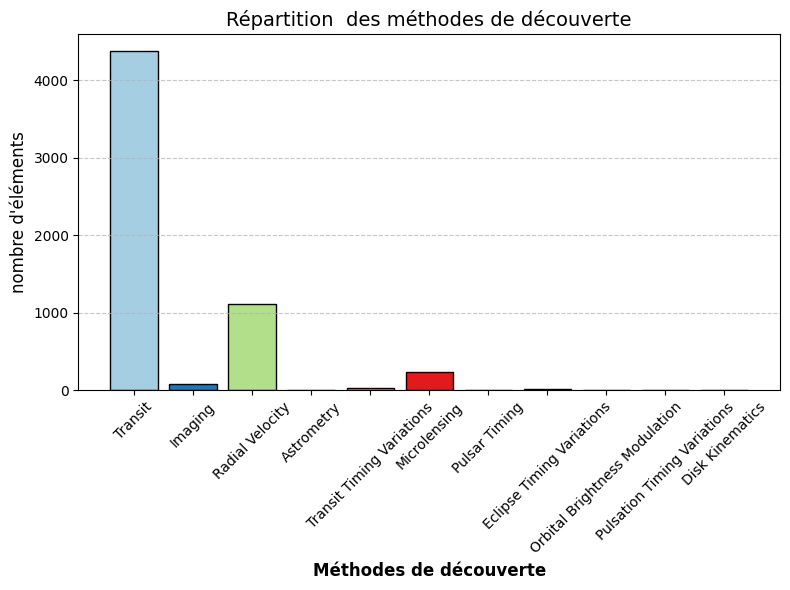

In [13]:
plt.figure(5, figsize=(8,6))
plt.bar(labels, counts, color=colors_barres, edgecolor='black')
plt.title("Répartition  des méthodes de découverte", fontsize=14)
plt.xlabel("Méthodes de découverte", fontsize=12, fontweight='bold')
plt.ylabel("nombre d'éléments", fontsize=12)
plt.xticks(rotation=45 , fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Charger les données
data = data_table_dict  # ta liste de dicts

# Convertir en DataFrame
df = pd.DataFrame(data)

# Définir les tranches d'années
bins = list(range(1990, 2026, 5))  # de 1990 à 2025 tous les 5 ans
labels = [f"{bins[i]}-{bins[i+1]}" for i in range(len(bins)-1)]

# Ajouter une colonne pour la tranche d'années
df['year_bin'] = pd.cut(df['disc_year'], bins=bins, labels=labels, right=False)

# Filtrer les données si besoin
df = df.dropna(subset=['year_bin', 'discoverymethod'])  # enlever les données sans année ou méthode


In [19]:
# Grouper
grouped = df.groupby(['year_bin', 'discoverymethod']).size().unstack(fill_value=0)

/tmp/ipykernel_70831/3672261538.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['year_bin', 'discoverymethod']).size().unstack(fill_value=0)


In [20]:
grouped

discoverymethod,Astrometry,Disk Kinematics,Eclipse Timing Variations,Imaging,Microlensing,Orbital Brightness Modulation,Pulsar Timing,Pulsation Timing Variations,Radial Velocity,Transit,Transit Timing Variations
year_bin,,,,,,,,,,,
1990-1995,0,0,0,0,0,0,3,0,0,0,0
1995-2000,0,0,0,0,0,0,0,0,27,0,0
2000-2005,0,0,0,3,1,0,1,0,95,6,0
2005-2010,0,0,1,14,9,0,0,1,198,55,0
2010-2015,1,0,8,19,21,6,1,0,201,1097,15
2015-2020,0,1,5,16,58,0,2,1,256,1968,6
2020-2025,2,0,3,31,146,3,1,0,323,1215,12


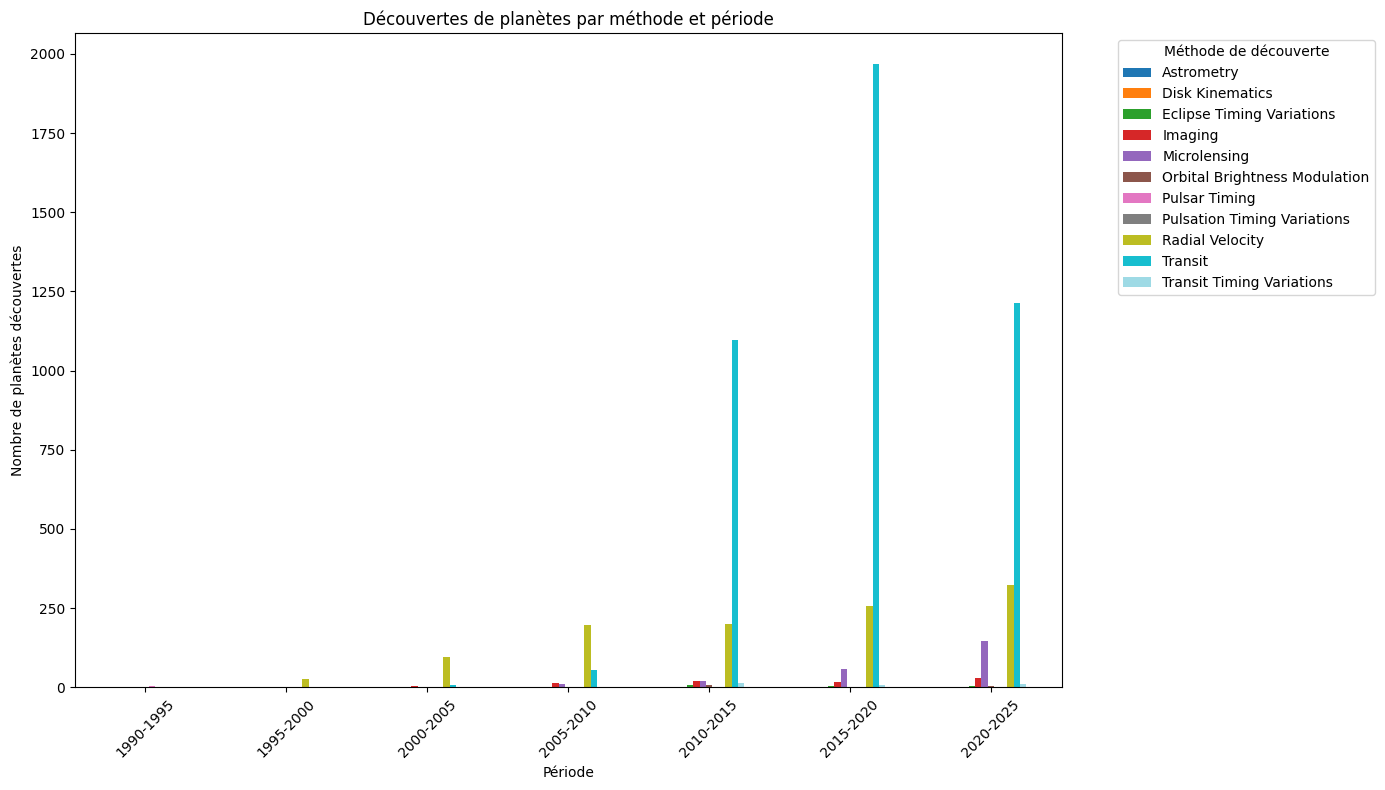

In [21]:
# Tracer
grouped.plot(kind='bar', stacked=False, figsize=(14,8), colormap='tab20')

plt.title('Découvertes de planètes par méthode et période')
plt.xlabel('Période')
plt.ylabel('Nombre de planètes découvertes')
plt.xticks(rotation=45)
plt.legend(title='Méthode de découverte', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()